In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop 
from keras.losses import binary_crossentropy
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras import backend as K

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [0]:
#keras metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#custom for comparing prediciton
def f1(y_true, y_pred):
  total_positives = np.sum(y_pred)
  actual_positives = np.sum(y_true)
  true_positives = np.sum(y_true.reshape(y_pred.shape)*y_pred)
  precision = true_positives/(total_positives+K.epsilon())
  recall = true_positives/(actual_positives+K.epsilon())
  f1_score = (2*precision*recall)/(precision + recall + K.epsilon())
  return f1_score

In [0]:
#draw history plots
def plot_history(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['acc'],'r',linewidth=3.0)
  plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

In [0]:
root = "/content/drive/My Drive/Colab Notebooks/Hotdog or Not Hotdog/"

In [9]:
datagen = ImageDataGenerator()
train_gen = datagen.flow_from_directory(
    root+'train data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)
val_gen = datagen.flow_from_directory(
    root+'val data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)
test_gen = datagen.flow_from_directory(
    root+'test data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)

Found 5070 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [0]:
def model_type3():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [22]:
model3_v1 = model_type3()
!ls "/content/drive/My Drive/Colab Notebooks/Hotdog or Not Hotdog/"

Augment Data.ipynb		 test data   vgg16_weights.h5
Hotdog or Not Hotdog - v2.ipynb  train data  weights
Hotdog or Not Hotdog - v3.ipynb  val data


In [23]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
model3_v1.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [25]:
history3 = model3_v1.fit_generator(train_gen,
                        epochs=20, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v1.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/20
80/80 [==============================] - 36s 455ms/step - loss: 0.6424 - acc: 0.6524 - f1_score: 0.6496 - val_loss: 0.5531 - val_acc: 0.7574 - val_f1_score: 0.7720
Epoch 2/20
80/80 [==============================] - 30s 370ms/step - loss: 0.5731 - acc: 0.7205 - f1_score: 0.7228 - val_loss: 0.5014 - val_acc: 0.7633 - val_f1_score: 0.7703
Epoch 3/20
80/80 [==============================] - 29s 363ms/step - loss: 0.5335 - acc: 0.7566 - f1_score: 0.7611 - val_loss: 0.4694 - val_acc: 0.8107 - val_f1_score: 0.8095
Epoch 4/20
80/80 [==============================] - 28s 351ms/step - loss: 0.5033 - acc: 0.7783 - f1_score: 0.7781 - val_loss: 0.4247 - val_acc: 0.8225 - val_f1_score: 0.8283
Epoch 5/20
80/80 [==============================] - 30s 370ms/step - loss: 0.4594 - acc: 0.8018 - f1_score: 0.7987 - val_loss: 0.3953 - val_acc: 0.8166 - val_f1_score: 0.8217
Epoch 6/20
80/80 [==============================] - 30s 375ms/step - loss: 0.4220 - acc: 0.8171 - f1_score: 0.8158 - val_loss

In [27]:
history3 = model3_v1.fit_generator(train_gen,
                        epochs=50, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v1.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True,
                        initial_epoch=20)

Epoch 21/50
80/80 [==============================] - 31s 383ms/step - loss: 0.1534 - acc: 0.9509 - f1_score: 0.9481 - val_loss: 0.1459 - val_acc: 0.9290 - val_f1_score: 0.9248
Epoch 22/50
80/80 [==============================] - 30s 370ms/step - loss: 0.1414 - acc: 0.9558 - f1_score: 0.9541 - val_loss: 0.1398 - val_acc: 0.9349 - val_f1_score: 0.9317
Epoch 23/50
80/80 [==============================] - 30s 370ms/step - loss: 0.1297 - acc: 0.9574 - f1_score: 0.9556 - val_loss: 0.1977 - val_acc: 0.9172 - val_f1_score: 0.9082
Epoch 24/50
80/80 [==============================] - 30s 372ms/step - loss: 0.1324 - acc: 0.9560 - f1_score: 0.9534 - val_loss: 0.2504 - val_acc: 0.8935 - val_f1_score: 0.8768
Epoch 25/50
80/80 [==============================] - 29s 368ms/step - loss: 0.1120 - acc: 0.9656 - f1_score: 0.9637 - val_loss: 0.1142 - val_acc: 0.9586 - val_f1_score: 0.9546
Epoch 26/50
80/80 [==============================] - 29s 363ms/step - loss: 0.1071 - acc: 0.9659 - f1_score: 0.9649 - va

In [31]:
model3_v1.load_weights(root+"weights/model3-v1.h5")
model3_v1.evaluate_generator(test_gen)

[0.5106000304222107, 0.8392857313156128, 0.8235293626785278]

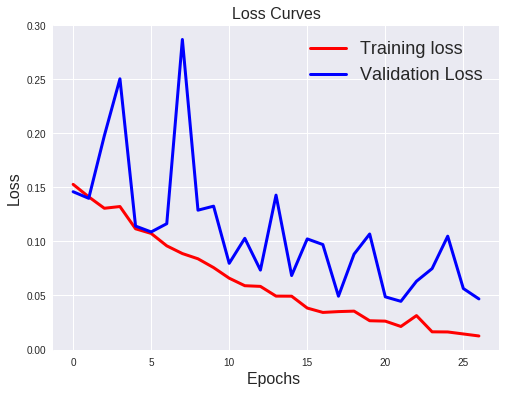

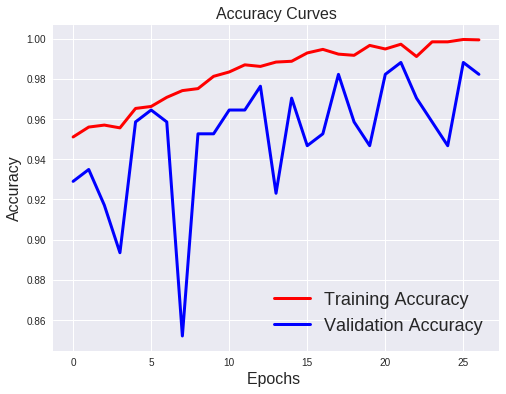

In [32]:
plot_history(history3)

In [0]:
def model_type3_2():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1(0.001),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1(0.001),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model3_v2 = model_type3_2()

In [0]:
model3_v2.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [57]:
history4 = model3_v2.fit_generator(train_gen,
                        epochs=100, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v2.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/100
80/80 [==============================] - 36s 455ms/step - loss: 32.2377 - acc: 0.6373 - f1_score: 0.6611 - val_loss: 31.7633 - val_acc: 0.7337 - val_f1_score: 0.7462
Epoch 2/100
80/80 [==============================] - 29s 367ms/step - loss: 31.3413 - acc: 0.6892 - f1_score: 0.6967 - val_loss: 30.8899 - val_acc: 0.7160 - val_f1_score: 0.6892
Epoch 3/100
80/80 [==============================] - 31s 390ms/step - loss: 30.4915 - acc: 0.7213 - f1_score: 0.7216 - val_loss: 30.0477 - val_acc: 0.7396 - val_f1_score: 0.7500
Epoch 4/100
80/80 [==============================] - 30s 372ms/step - loss: 29.6726 - acc: 0.7473 - f1_score: 0.7510 - val_loss: 29.2341 - val_acc: 0.7811 - val_f1_score: 0.7850
Epoch 5/100
80/80 [==============================] - 31s 387ms/step - loss: 28.8783 - acc: 0.7844 - f1_score: 0.7876 - val_loss: 28.4637 - val_acc: 0.8107 - val_f1_score: 0.8031
Epoch 6/100
80/80 [==============================] - 31s 385ms/step - loss: 28.1187 - acc: 0.8000 - f1_score: 

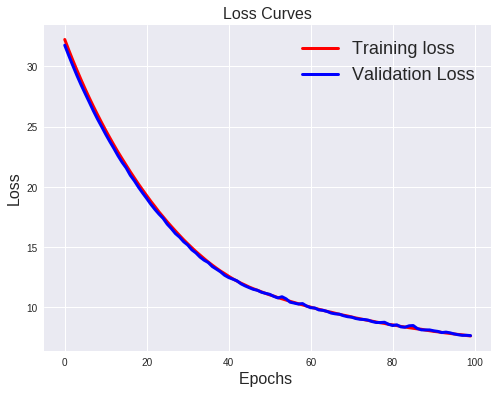

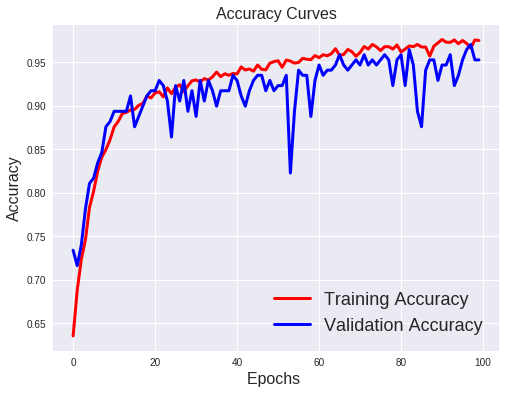

In [58]:
plot_history(history4)

In [12]:
model3_v2.load_weights(root+"weights/model3-v2.h5")
model3_v2.evaluate_generator(test_gen)

[8.068201065063477, 0.875, 0.8679243922233582]

In [0]:
def model_type3_3():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l2(0.009),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l2(0.009),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model3_v3 = model_type3_3()

In [0]:
model3_v3.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [22]:
history5 = model3_v3.fit_generator(train_gen,
                        epochs=100, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v3.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/100
80/80 [==============================] - 34s 424ms/step - loss: 11.4765 - acc: 0.6950 - f1_score: 0.6742 - val_loss: 11.2202 - val_acc: 0.7574 - val_f1_score: 0.7680
Epoch 2/100
80/80 [==============================] - 29s 360ms/step - loss: 11.0498 - acc: 0.7439 - f1_score: 0.7404 - val_loss: 10.8395 - val_acc: 0.7396 - val_f1_score: 0.7089
Epoch 3/100
80/80 [==============================] - 29s 368ms/step - loss: 10.6978 - acc: 0.7691 - f1_score: 0.7659 - val_loss: 10.4976 - val_acc: 0.8166 - val_f1_score: 0.8159
Epoch 4/100
80/80 [==============================] - 29s 362ms/step - loss: 10.3728 - acc: 0.7827 - f1_score: 0.7795 - val_loss: 10.1863 - val_acc: 0.8166 - val_f1_score: 0.8112
Epoch 5/100
80/80 [==============================] - 29s 368ms/step - loss: 10.0703 - acc: 0.7865 - f1_score: 0.7815 - val_loss: 9.8938 - val_acc: 0.8225 - val_f1_score: 0.8147
Epoch 6/100
80/80 [==============================] - 30s 373ms/step - loss: 9.7748 - acc: 0.7987 - f1_score: 0.

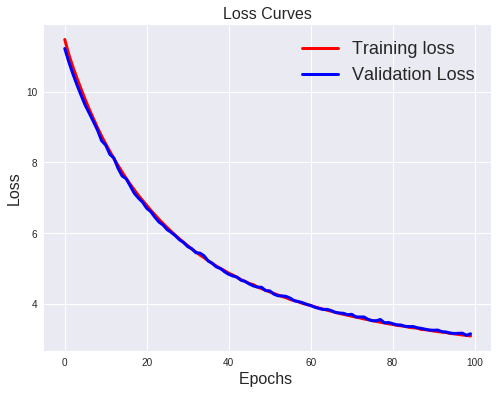

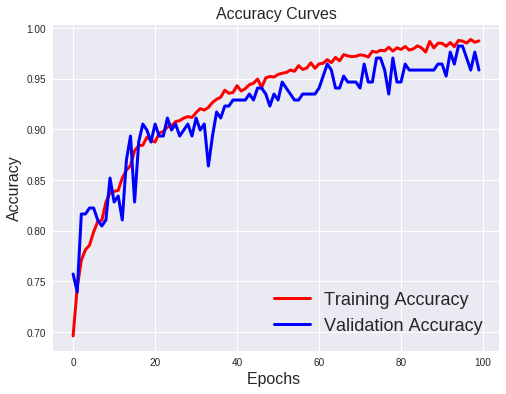

In [25]:
plot_history(history5)

In [27]:
model3_v3.load_weights(root+"weights/model3-v3.h5")
model3_v3.evaluate_generator(test_gen)

[3.836920976638794, 0.8214285969734192, 0.7999999523162842]

In [0]:
def model_type3_4():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model3_v4 = model_type3_4()

In [0]:
model3_v4.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [63]:
history6 = model3_v4.fit_generator(train_gen,
                        epochs=1000, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v4.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/1000
80/80 [==============================] - 39s 487ms/step - loss: 11.7619 - acc: 0.6616 - f1_score: 0.4297 - val_loss: 2.9020 - val_acc: 0.8757 - val_f1_score: 0.8728
Epoch 2/1000
80/80 [==============================] - 29s 365ms/step - loss: 1.8109 - acc: 0.8329 - f1_score: 0.8302 - val_loss: 1.2209 - val_acc: 0.8876 - val_f1_score: 0.8864
Epoch 3/1000
80/80 [==============================] - 31s 382ms/step - loss: 1.0720 - acc: 0.8404 - f1_score: 0.8343 - val_loss: 1.0376 - val_acc: 0.7811 - val_f1_score: 0.7253
Epoch 4/1000
80/80 [==============================] - 30s 370ms/step - loss: 0.8559 - acc: 0.8567 - f1_score: 0.8502 - val_loss: 0.7750 - val_acc: 0.9053 - val_f1_score: 0.8992
Epoch 5/1000
80/80 [==============================] - 30s 381ms/step - loss: 0.7495 - acc: 0.8632 - f1_score: 0.8570 - val_loss: 0.7334 - val_acc: 0.8580 - val_f1_score: 0.8386
Epoch 6/1000
80/80 [==============================] - 30s 378ms/step - loss: 0.7030 - acc: 0.8693 - f1_score: 0.86

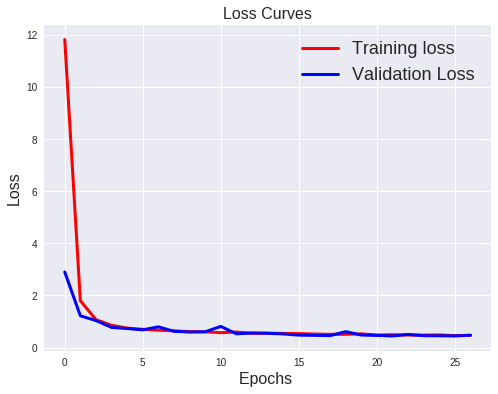

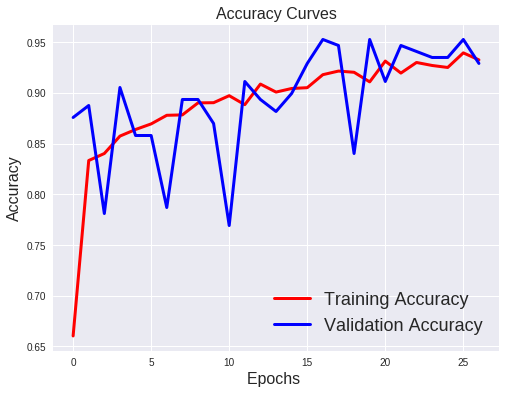

In [64]:
plot_history(history6)

In [65]:
model3_v4.load_weights(root+"weights/model3-v4.h5")
model3_v4.evaluate_generator(test_gen)

[0.7822971343994141, 0.7678571343421936, 0.7450980544090271]

In [0]:
def model_type3_5():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_2'))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv2_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv2_2"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv3_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv4_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc1"))
  model.add(Dropout(0.25))
  model.add(Dense(256, 
                  activation='relu',
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc2"))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model3_v5 = model_type3_5()
model3_v5.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [87]:
history7 = model3_v5.fit_generator(train_gen,
                        epochs=300, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v5.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/300
80/80 [==============================] - 49s 609ms/step - loss: 0.7874 - acc: 0.5201 - f1_score: 0.5178 - val_loss: 0.6772 - val_acc: 0.6923 - val_f1_score: 0.7380
Epoch 2/300
80/80 [==============================] - 38s 476ms/step - loss: 0.6869 - acc: 0.5787 - f1_score: 0.5761 - val_loss: 0.6755 - val_acc: 0.6864 - val_f1_score: 0.7324
Epoch 3/300
80/80 [==============================] - 37s 466ms/step - loss: 0.6741 - acc: 0.5951 - f1_score: 0.5831 - val_loss: 0.6721 - val_acc: 0.6331 - val_f1_score: 0.6261
Epoch 4/300
80/80 [==============================] - 38s 477ms/step - loss: 0.6616 - acc: 0.6141 - f1_score: 0.6175 - val_loss: 0.6654 - val_acc: 0.6923 - val_f1_score: 0.7453
Epoch 5/300
80/80 [==============================] - 38s 471ms/step - loss: 0.6535 - acc: 0.6265 - f1_score: 0.6201 - val_loss: 0.6622 - val_acc: 0.7160 - val_f1_score: 0.7604
Epoch 6/300
80/80 [==============================] - 37s 466ms/step - loss: 0.6466 - acc: 0.6307 - f1_score: 0.6320 - va

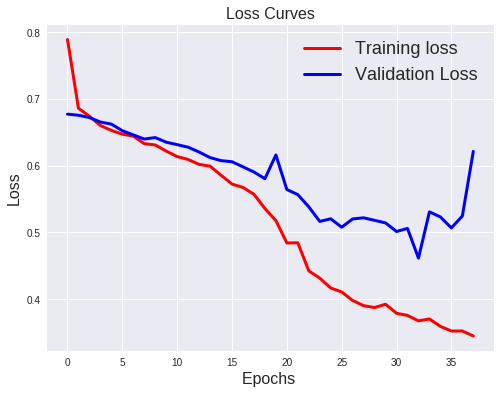

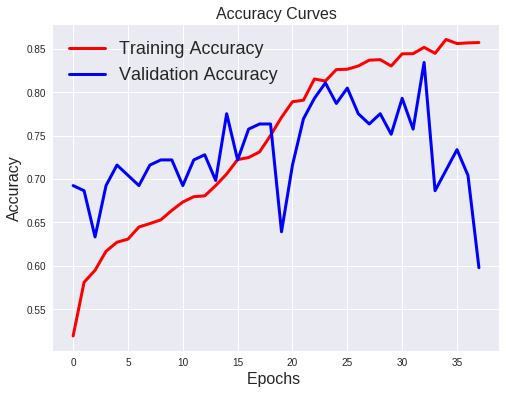

In [88]:
plot_history(history7)

In [89]:
model3_v5.load_weights(root+"weights/model3-v5.h5")
model3_v5.evaluate_generator(test_gen)

[0.5250362157821655, 0.8035714030265808, 0.7924527525901794]

In [0]:
def model_type3_6():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_2'))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv2_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv2_2"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv3_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv3_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv3_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv4_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv4_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv4_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                  name="fc1"))
  model.add(Dropout(0.25))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                  name="fc2"))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model3_v6 = model_type3_6()
model3_v6.compile(optimizer=Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1_score])

In [18]:
history8 = model3_v6.fit_generator(train_gen,
                        epochs=300, 
                        verbose=1, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5),
                                   ModelCheckpoint(root+"weights/model3-v6.h5",
                                                   monitor='val_acc',
                                                   save_best_only=True, 
                                                   save_weights_only=True,
                                                   mode='max')], 
                        validation_data=val_gen,
                        workers=3,
                        use_multiprocessing=True,
                        shuffle=True)

Epoch 1/300
80/80 [==============================] - 675s 8s/step - loss: 65.0846 - acc: 0.5223 - f1_score: 0.5147 - val_loss: 61.3672 - val_acc: 0.6036 - val_f1_score: 0.6899
Epoch 2/300
80/80 [==============================] - 36s 455ms/step - loss: 57.8455 - acc: 0.6130 - f1_score: 0.6009 - val_loss: 54.2947 - val_acc: 0.7101 - val_f1_score: 0.7536
Epoch 3/300
80/80 [==============================] - 37s 458ms/step - loss: 50.9425 - acc: 0.7519 - f1_score: 0.7541 - val_loss: 47.7615 - val_acc: 0.7337 - val_f1_score: 0.7792
Epoch 4/300
80/80 [==============================] - 37s 464ms/step - loss: 44.7307 - acc: 0.7870 - f1_score: 0.7877 - val_loss: 41.8521 - val_acc: 0.7633 - val_f1_score: 0.7802
Epoch 5/300
80/80 [==============================] - 37s 464ms/step - loss: 39.1422 - acc: 0.8055 - f1_score: 0.8078 - val_loss: 36.5907 - val_acc: 0.7811 - val_f1_score: 0.7993
Epoch 6/300
80/80 [==============================] - 36s 455ms/step - loss: 34.1972 - acc: 0.8142 - f1_score: 0.

In [19]:
model3_v6.evaluate_generator(test_gen)

[1.528350591659546, 0.75, 0.7499999403953552]

In [0]:
model3_v6.load_weights(root+'weights/model3-v6.h5')

In [21]:
model3_v6.evaluate_generator(test_gen)

[1.5759150981903076, 0.875, 0.8571427464485168]